# 01 Introductions

In the world of Pre-Covid19, Hospitality Business was a growing industry, particularly in the Asia Region. According to Jones Lang Lasalle, the transaction volume of Hotels Industry in Asia Region was expected to grow by 15%. It was due to an increase in international tourists in the region. Asia region saw the highest increase in international tourists' arrival in the 1st Quarter of 2019 compared to the other side of the globe. Besides the growth in demand, there was also a significant flux in supply. Not only do the competitions increased the quantity of supply, but they also come in various forms, offering and business models, ranging from modified apartments, sharing economy models like Airbnb, to residentials that were modified into lodging.

Nevertheless, the fierce and rapidly changing competitions, may not deter everyone to join the fray. Growth in this industry (again, this project assumes a timeline in which COVID19 has not and will not emerge) will lure investors to start their venture in hospitality industries. One of the first and foremost things to do to start a hospitality project is deciding the location. The location of the hotel may make or break the whole business. It will also shape the business model and offerings. For instance, location near the Central Business District or Downtown may have a completely different offering and model compared to those in suburbia. Hence, choosing a location for a hotel is a paramount task. This project intends to demonstrate the power of data science and analytics in aiding prospective investors to understand the potential locations and what it means for the business.

The scenario underlying this project is as follows: A client is planning to start a hospitality business near the downtown of Jakarta, Indonesia (to be more specific: Senayan, South Jakarta). However, the client has not had any directions or candidates for location. As this is an early stage of the business planning, the client only wants to know the general outlooks of the neighborhood, mainly what are the challenges and opportunities associated with each neighborhood. The client would also appreciate if types of lodging are considered in the analysis as well.

---
In short, this project is asking:  
### **"Using the power of data science, How are each neighborhood differs when it comes to choosing a location for starting a new hospitality project?"**  
Analysis Type: Descriptive Analysis  
Analysis Method: Clustering (KNN Algorithm)

---
Analytics Framework :
2 prongs of aspects I will be exploring on this project are the opportunities & challenges associated with each location.
  * **Challenges** refer to the competitions existing in the neighborhood. More competition would mean that it is going to be tougher to grab market attention. This analysis will be ranging from how many hotels are available in the areas, what are the types, how popular are they?
  * **Opportunities** refer to the interesting venues in the neighborhood. Particularly for tourists or visitors, proximity to good venues (like, famous restaurants, nightclubs, etc0 would be very appealing. Hence, I will explore the venues near within the neighborhood, what are the types? what kind of activities that future visitors can enjoy nearby the neighborhood?
  
The output of this report may not be necessarily recommending a certain location to the client, but more to descriptive analysis of how each neighborhood differs and how it would implicate the projects.

### Install and import necessary library

In [1]:
!pip install googlemaps
!pip install prettyprint
!pip install utm
!pip install folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import folium
import json
from pandas.io.json import json_normalize
import googlemaps
import pprint
import time
import utm

  Stored in directory: /home/dsxuser/.cache/pip/wheels/b1/f3/2a/6b416bce171c73da2891978bb6efc5011f000e074e72f51ed8
Successfully built googlemaps
  Stored in directory: /home/dsxuser/.cache/pip/wheels/9e/79/19/8ef925fdc275044a78b6243438800941e85f8de8c3b7a6bcd1
Successfully built prettyprint
  Stored in directory: /home/dsxuser/.cache/pip/wheels/22/85/c2/314ffed39b8e02ca623e9b7d2ad7fcf3f8544a0e77c096be76
Successfully built utm
     |████████████████████████████████| 102kB 8.8MB/s ta 0:00:011


Declare Foursquare Client ID & Client Secret as well as Google Places API Key

In [2]:
# The code was removed by Watson Studio for sharing.

---
---
# 02 Data Gathering & Processing
---
---

From these approaches, there are 2 sets of data needed, such as:
   * **Hotels Dataset**  
   Hotels dataset will be provided for the Challenges analysis. The dataset should ideally be list of hotels nearby Senayan, including latitude & longitude, ratings, amount of ratings as well as the type of lodging as we will also consider the type of lodging. Types of lodging may need to be further analyzed on Data Processing stages to decide how will the type is going to be categorized.  
   Data source : Using Google Places API
   * **Venues Dataset**  
   Venues dataset is needed for opportunities analysis. Dataset is expected to contain latitude & longitude of public facilities nearby Senayan as well as their categories, ie, Food & Beverages, entertainment, etc.  
   Data source : Foursquare API
   
*Disclaimer* : As with current condition of COVID19, lists of hotels procured from Google Places API may not capture the true lists in normal situation as some hotels may be closed down. This project will however assume that the data provided is valid and represent the real situation due to the unavailability of other sources. Data will be updated when the normal has resume.

## 2.1 Collect Neighborhood Data

This chapter is dedicated to create grids of neighborhood that is going to be assessed. It starts with declaring latitude and longitude of Senayan, South Jakarta

In [3]:
#Latitude & longitude of Senayan, South Jakarta
latitude = -6.226250
longitude = 106.809729

Create grids of latitude longitude as the centroid of the study area

In [4]:
#convert to XY (Cartesian)
xy = utm.from_latlon(latitude, longitude)
x,y = xy[0],xy[1]

#Create A Grid of Points with dimension of 'ax'*'ay' with distance of 'distance'
lists = []
ax = 3
ay = 3
xpos, xneg, ypos, yneg = x,x,y,y
distance = 1000
disty = distance * np.sqrt(3)/2
for i in range (0,ax+1):
    xpos = x + (distance*i)
    xneg = x - (distance*i)
    for j in range(0,ay+1):
        ypos = y + (disty*j)
        yneg = y - (disty*j)
        if j%2 == 0:
            off = distance/2
        else: off = 0
        lists.append([xpos+off,ypos])
        lists.append([xpos+off,yneg])
        lists.append([xneg+off,ypos])
        lists.append([xneg+off,yneg])

#Convert back to Latlng
lists= np.array(lists)
lists = utm.to_latlon(lists[:,0],lists[:,1],48,'M')

#Visualize the Locations
map_jaksel = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map
for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',
        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_jaksel)
    folium.Circle(
        [lat, lng],
        radius=600,
        color='blue',
        fill=False,
        parse_html=False).add_to(map_jaksel)
map_jaksel

Save the latitude longitude to variable dfstudyarea

In [5]:
dfstudyarea = []
for i,j in zip(lists[0],lists[1]):
    dfstudyarea.append([i,j])
dfstudyarea=pd.DataFrame(dfstudyarea)

dfstudyarea.columns = ['latitude','longitude']
dfstudyarea.drop_duplicates(inplace=True)
dfstudyarea.shape
dfstudyarea.reset_index(inplace=True, drop = True)

From this section, we obtained :
  1. List of Latitude Longitude Of Study Areas (Centroid of the circles)
  2. Radius of search of 600m so that there are no cavity among the circles

# 2.2 Gathering Hotels Data

Gathering Hotels Data is done using the code below. This code has been pre-run before and the data have been saved to cloud storage in IBM to avoid re-collecting the data from google places API

hotel_list = pd.DataFrame([])  
radius = 600  
fail_index = []  
fail_index_b = []  

#gmaps = googlemaps.Client(key = gmaps_apikey)  

for q,loc in enumerate(loclist):  
    try:  
        temp = gmaps.places_nearby(location = loc, radius = radius, open_now = False, type = 'lodging')  
        tempdf = json_normalize(temp['results'])  
        hotel_list = hotel_list.append(tempdf)  

        for i in range(0,2):
            try:
                time.sleep(2)
                temp = gmaps.places_nearby(page_token = temp['next_page_token'])
                tempdf = json_normalize(temp['results'])
                hotel_list=hotel_list.append(tempdf)
            except: fail_index_b.append(str(q)+str(i+1))
    except:
        fail_index.append(q)
    time.sleep(3)

The code below is used to save the collected hotel list from google places API into storage in IBM Watson

rawdata_hotel_list = pd.DataFrame(hotel_list)
#from project_lib import Project
#project = Project(pd,*--Sensitive Information--*)
project.save_data(file_name = "rawdata_hotel_list.csv",data = rawdata_hotel_list.to_csv(index=False))

### Hotel Data Cleanup

In [6]:
# The code was removed by Watson Studio for sharing.

,business_status,geometry.location.lat,geometry.location.lng,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,icon,id,name,...,photos,place_id,plus_code.compound_code,plus_code.global_code,rating,reference,scope,types,user_ratings_total,vicinity
0,OPERATIONAL,-6.227356,106.818995,-6.226300,106.819964,-6.228998,106.817266,https://maps.gstatic.com/mapfiles/place_api/ic...,f6db3398e5e5a708c5f5c7cdc7fc6614f995fff0,Hotel Kartika Chandra,...,"[{'height': 720, 'html_attributions': ['<a hre...",ChIJs5U1yeLzaS4RytKL8ru-Yik,"QRF9+3H Karet Semanggi, South Jakarta City, Ja...",6P58QRF9+3H,4.3,ChIJs5U1yeLzaS4RytKL8ru-Yik,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",5816.0,"Jl. Jendral Gatot Subroto Kav. 18-20, Karet Se..."
1,OPERATIONAL,-6.224051,106.809820,-6.223208,106.811327,-6.226564,106.808372,https://maps.gstatic.com/mapfiles/place_api/ic...,1ca10119763f50fd2ec807f0b613264d7db9bf20,"The Ritz-Carlton Jakarta, Pacific Place",...,"[{'height': 1366, 'html_attributions': ['<a hr...",ChIJAQAAQFjxaS4R9BsxAFFtVzA,"QRG5+9W South Jakarta, South Jakarta City, Jak...",6P58QRG5+9W,4.7,ChIJAQAAQFjxaS4R9BsxAFFtVzA,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",7737.0,"Scbd, Sudirman Central Business District, Jala..."
2,OPERATIONAL,-6.227112,106.819572,-6.225743,106.820906,-6.228441,106.818208,https://maps.gstatic.com/mapfiles/place_api/ic...,70f4b2c478c805209f9e8097810a1911578bb976,favehotel Gatot Subroto Jakarta,...,"[{'height': 427, 'html_attributions': ['<a hre...",ChIJ0yJpNP3zaS4R5r4fsXvnHSE,"QRF9+5R Karet Semanggi, South Jakarta City, Ja...",6P58QRF9+5R,4.2,ChIJ0yJpNP3zaS4R5r4fsXvnHSE,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",2533.0,"Jalan Kartika Candra No.kav. A9, RT.5/RW.2, Ka..."
3,OPERATIONAL,-6.221657,106.814922,-6.220499,106.816011,-6.223197,106.813313,https://maps.gstatic.com/mapfiles/place_api/ic...,ac1964560b042fa3858461ea3be87ae957490022,Crowne Plaza Jakarta,...,"[{'height': 1356, 'html_attributions': ['<a hr...",ChIJ_foHy1XxaS4RVJ7L7nQJtA8,"QRH7+8X South Jakarta, South Jakarta City, Jak...",6P58QRH7+8X,4.4,ChIJ_foHy1XxaS4RVJ7L7nQJtA8,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",4019.0,Jalan Gatot Subroto Jalan Kavling II No.3
4,OPERATIONAL,-6.229650,106.812740,-6.228309,106.813986,-6.231007,106.811288,https://maps.gstatic.com/mapfiles/place_api/ic...,3806835835a95c0f6cf3dd1abdcd05e40db12e7b,Azana kost,...,"[{'height': 425, 'html_attributions': ['<a hre...",ChIJ9ZQzkFnxaS4ROT0KqpICG74,"QRC7+43 Senayan, South Jakarta City, Jakarta, ...",6P58QRC7+43,3.9,ChIJ9ZQzkFnxaS4ROT0KqpICG74,GOOGLE,"['lodging', 'point_of_interest', 'establishment']",23.0,"Jalan Tulodong Bawah I No.16, RT.3/RW.1, Senayan"


Data collected from Google Places API is saved into 4 different dataframe, namely df_data_1,df_data_2,df_data_3,df_data_4. The script below is used to save all df into i dataframe

In [7]:
df1 = df_data_1
df2 = df_data_2
df3 = df_data_3
df4 = df_data_4
df = pd.concat([df1,df2,df3,df4])
print(df.shape)
df.head()

df=df[['place_id','name','rating','types','user_ratings_total', 'vicinity','geometry.location.lat', 'geometry.location.lng']]
df.rename(columns = {'geometry.location.lat':'latitude','geometry.location.lng':'longitude','vicinity':'address'}, inplace=True)
print(df.shape)
df.head()

(4849, 21)
(4849, 8)


,place_id,name,rating,types,user_ratings_total,address,latitude,longitude
0,ChIJs5U1yeLzaS4RytKL8ru-Yik,Hotel Kartika Chandra,4.3,"['lodging', 'point_of_interest', 'establishment']",5816.0,"Jl. Jendral Gatot Subroto Kav. 18-20, Karet Se...",-6.227356,106.818995
1,ChIJAQAAQFjxaS4R9BsxAFFtVzA,"The Ritz-Carlton Jakarta, Pacific Place",4.7,"['lodging', 'point_of_interest', 'establishment']",7737.0,"Scbd, Sudirman Central Business District, Jala...",-6.224051,106.809820
2,ChIJ0yJpNP3zaS4R5r4fsXvnHSE,favehotel Gatot Subroto Jakarta,4.2,"['lodging', 'point_of_interest', 'establishment']",2533.0,"Jalan Kartika Candra No.kav. A9, RT.5/RW.2, Ka...",-6.227112,106.819572
3,ChIJ_foHy1XxaS4RVJ7L7nQJtA8,Crowne Plaza Jakarta,4.4,"['lodging', 'point_of_interest', 'establishment']",4009.0,Jalan Gatot Subroto Jalan Kavling II No.3,-6.221657,106.814922
4,ChIJ9ZQzkFnxaS4ROT0KqpICG74,Azana kost,3.9,"['lodging', 'point_of_interest', 'establishment']",23.0,"Jalan Tulodong Bawah I No.16, RT.3/RW.1, Senayan",-6.229650,106.812740


We then start the data cleaning effort by removing the duplicates & deal with Null

In [8]:
# Remove Duplicates

print(df.shape)
print(len(df['place_id'].unique()))

df.drop_duplicates(inplace=True)
print(df.shape)

# Dealing With Missing Values
df.info()
df[df['address'].isnull()]
df[df['rating'].isnull()]

(4849, 8)
2016
(2024, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 462
Data columns (total 8 columns):
place_id              2024 non-null object
name                  2024 non-null object
rating                1165 non-null float64
types                 2024 non-null object
user_ratings_total    1165 non-null float64
address               2020 non-null object
latitude              2024 non-null float64
longitude             2024 non-null float64
dtypes: float64(4), object(4)
memory usage: 142.3+ KB


,place_id,name,rating,types,user_ratings_total,address,latitude,longitude
7,ChIJAQAAwFDxaS4RP3Y2TCyQQjs,Mekaki Bay Resorts,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"Equity Tower Building, 35th Floor Suite A, Sud...",-6.226676,106.810463
14,ChIJRYhFY7jxaS4R3khpERDNNv4,Hotel Ug3,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"RT.4/RW.1, Senayan",-6.227742,106.811607
19,ChIJWZhae9vxaS4RDFHE7_w8CcE,PINTU LIPI WIDYA CANDRA,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"Jalan Gatot Subroto No.Kav 10, RT.6/RW.7, Kuni...",-6.227940,106.817373
22,ChIJr22F7R7xaS4RR_A8PgfJ1Wk,Arah balik ke hotel,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"RT.1/RW.4, Karet Semanggi",-6.222147,106.814408
23,ChIJa4VrysPxaS4R9KeFDt6vye0,SZJ Resident,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"Jalan Tulodong Bawah No.17, RT.3/RW.1, Senayan",-6.230061,106.812703
24,ChIJZ0lXvIDzaS4RyelLe9AmQLc,Pangkalan Taksi KHUSUS DR,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"RT.8/RW.2, Karet Semanggi",-6.227271,106.818312
25,ChIJxQJutvXxaS4RrDBpNlo-vd4,TB 6,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"Jalan Tulodong Bawah No.6, RT.10/RW.4, Selong",-6.230317,106.812880
26,ChIJTe626BLzaS4R8VbLmZz45fA,Mrkas Taksi Blue Bird,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"RT.8/RW.2, Karet Semanggi",-6.227519,106.818396
27,ChIJQQvctzXxaS4R-i1Ilfq0saE,Mutiara Candra Residen,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,"RT.8/RW.1, Senayan",-6.230465,106.815181
30,ChIJX94OGlHxaS4RMAwtnTgRuQs,Global Capital Hotels,NaN,"['lodging', 'point_of_interest', 'establishment']",NaN,One Pacific Place #11-08 Jalan Jend. Sudirman ...,-6.224798,106.810036


Insight : All of the data with NaN values at ratings & address are not hotels.  
Decision : Drop All of Them

In [9]:
df.dropna(inplace=True)
df.shape

(1165, 8)

Kos is somekind of boarding houses people in Indonesia. Tenant rent a room in a house for a long period. It is considered not a type of hotel but google places data mix this up. Hence we need to remove it

In [10]:
#Remove Kos

dfhotel = df.copy()
dfhotel = dfhotel[np.logical_not(dfhotel['name'].str.contains('kos'))]
dfhotel = dfhotel[np.logical_not(dfhotel['name'].str.contains('KOS'))]
dfhotel = dfhotel[np.logical_not(dfhotel['name'].str.contains('Kos'))]
dfhotel.shape

(785, 8)

I have checked these types below. It is not a hotel. Somehow the query for hotels in google places API mix them in. So lets remove them.

In [11]:
#Remove Not Hotels

dfhotel = dfhotel[np.logical_not(dfhotel['types']=="['travel_agency', 'lodging', 'point_of_interest', 'establishment']")]
dfhotel = dfhotel[np.logical_not(dfhotel['place_id']=="ChIJ-87BAU_xaS4ReVIOMF8Pdcw")]
dfhotel = dfhotel[np.logical_not(dfhotel['types']=="['lodging', 'food', 'point_of_interest', 'establishment']")]
dfhotel = dfhotel[np.logical_not(dfhotel['place_id']=="ChIJJxliaGfxaS4RZrjUQKexOdA")]
dfhotel = dfhotel[np.logical_not(dfhotel['place_id']=="ChIJPekPWlDxaS4RbdabmZBMhRg")]
dfhotel = dfhotel[np.logical_not(dfhotel['place_id']=="ChIJeQZilMLzaS4R5L9RKy4EmLw")]
dfhotel = dfhotel[np.logical_not(dfhotel['types']=="['grocery_or_supermarket', 'lodging', 'food', 'point_of_interest', 'store', 'establishment']")]
dfhotel = dfhotel[np.logical_not(dfhotel['types']=="['spa', 'lodging', 'point_of_interest', 'establishment']")]
dfhotel = dfhotel[np.logical_not(dfhotel['types']=="['lodging', 'point_of_interest', 'store', 'establishment']")]
dfhotel = dfhotel[np.logical_not(dfhotel['types']=="['rv_park', 'lodging', 'point_of_interest', 'establishment']")]
dfhotel = dfhotel[np.logical_not(dfhotel['types']=="['lodging', 'general_contractor', 'point_of_interest', 'establishment']")]
dfhotel = dfhotel[np.logical_not(dfhotel['name'].str.contains('PT'))]
print(dfhotel['types'].unique())
dfhotel.shape

["['lodging', 'point_of_interest', 'establishment']"
 "['lodging', 'restaurant', 'food', 'point_of_interest', 'establishment']"
 "['real_estate_agency', 'lodging', 'point_of_interest', 'establishment']"
 "['restaurant', 'lodging', 'food', 'point_of_interest', 'establishment']"]


(746, 8)

Now assign the lodging type category

In [12]:
dfhotel.loc[:,'lodging_type']=''
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('otel'), 'hotels', dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('The'), 'hotels', dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('the'), 'hotels', dfhotel['lodging_type'])

dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('partment'), 'apartments',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('partemen'), 'apartments',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('esidence'), 'residences',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('ansion'), 'residences',dfhotel['lodging_type'])

dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('RedDoor'), 'houses-chain',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('Airy'), 'houses-chain',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('OYO'), 'houses-chain',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('ukita'), 'houses-chain',dfhotel['lodging_type'])

dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('ouse'), 'houses-modified',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('Home'), 'houses-modified',dfhotel['lodging_type'])

filter1 = dfhotel['user_ratings_total']>1000
filter2 = dfhotel['lodging_type']==''
dfhotel.loc[:,'lodging_type'] = np.where(np.logical_and(filter1 ,filter2), 'hotels',dfhotel['lodging_type'])

dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('Somerset'), 'apartments',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('Oakwood'), 'apartments',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('Ascott'), 'apartments',dfhotel['lodging_type'])
dfhotel.loc[:,'lodging_type'] = np.where(dfhotel['name'].str.contains('Fraser'), 'apartments',dfhotel['lodging_type'])

In [15]:
dfhotel_temp = dfhotel[dfhotel['lodging_type']=='']

print(dfhotel_temp.shape)
dfhotel_temp.head()

(325, 9)


,place_id,name,rating,types,user_ratings_total,address,latitude,longitude,lodging_type
11,ChIJOVaOBVHxaS4Rtv0DBxpnpC8,Bugatti Express,4.0,"['lodging', 'point_of_interest', 'establishment']",2.0,"One pasific place jln. jend. kav.52-53, Jalan ...",-6.224822,106.809482,
12,ChIJKwiyrfPxaS4RN8-hVzf9V9Y,Rumah Dinas Mentan,5.0,"['lodging', 'point_of_interest', 'establishment']",2.0,"Jalan Widya Chandra V No.28, RT.7/RW.3, Senayan",-6.227778,106.813226,
13,ChIJ18yMN1bxaS4R293CyD5oKZ0,Office,4.3,"['lodging', 'point_of_interest', 'establishment']",3.0,"No.Kav 9-11, Jalan Gatot Subroto RT.2/RW.4, Ka...",-6.224591,106.816455,
16,ChIJt2zF7FnxaS4RijklUrr-Xwo,Wisma Pusdiklat Perindustrian,4.4,"['lodging', 'point_of_interest', 'establishment']",20.0,"Jalan Widya Chandra VIII No.23, RT.3/RW.1, Sen...",-6.229106,106.812914,
29,ChIJIW7zPvzxaS4RnNlaEb1Wt-M,Wisma TBT 46,4.6,"['lodging', 'point_of_interest', 'establishment']",9.0,"Jalan Tulodong Bawah VII No.46, RT.1/RW.1, Sen...",-6.229328,106.811155,


Drop the typeless data

In [16]:
dfhotel2 = dfhotel[dfhotel['lodging_type']!='']
dfhotel2.reset_index(inplace=True, drop=True)
dfhotel2.tail()

,place_id,name,rating,types,user_ratings_total,address,latitude,longitude,lodging_type
416,ChIJcxLcFPj1aS4R9ikXnodEqtY,RoomMe Kuningan Family Residence,3.6,"['lodging', 'point_of_interest', 'establishment']",39.0,"Jalan K.H. Royani no 52 RT.9/RW.1, Kuningan, R...",-6.216989,106.821584,residences
417,ChIJ9bPpkwT0aS4R50HePQZmJEI,Amelia Guest House,4.3,"['lodging', 'point_of_interest', 'establishment']",129.0,"Jalan Setia Budi V No.9, RT.5/RW.3, Kuningan, ...",-6.208697,106.824893,houses-modified
418,ChIJhTGOjRz0aS4RaLoNZgcnmsc,Fraser Residence Sudirman,4.6,"['lodging', 'point_of_interest', 'establishment']",1028.0,Jalan Setiabudi Raya No.9,-6.210330,106.823609,apartments
419,ChIJwfMSmAT0aS4RVCy9AM3iWyQ,the Pakis Jakarta,4.2,"['lodging', 'point_of_interest', 'establishment']",113.0,"Jalan Setia Budi Barat No.8, RT.5/RW.3, Kuning...",-6.208790,106.824323,hotels
420,ChIJHQeCkAT0aS4REQnn62VQ5BA,Flamingo Residence,4.0,"['lodging', 'point_of_interest', 'establishment']",76.0,"Jalan Setia Budi Barat No.5, RT.5/RW.3, Kuning...",-6.208695,106.824542,residences


In [17]:
#Visualize the Locations
map_jaksel = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map
for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',
        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_jaksel)
    folium.Circle(
        [lat, lng],
        radius=600,
        color='Red',
        fill=False,
        parse_html=False).add_to(map_jaksel)
for lat, lng in zip(dfhotel2['latitude'],dfhotel2['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Blue',
        fill=True,
        fill_color='BLue',
        fill_opacity=1,
        parse_html=False).add_to(map_jaksel)
map_jaksel

## 2.3. Gathering & Cleaning Venues Data

Start with collecting the data from Foursquare API

In [18]:
radius = 600
venues_list = pd.DataFrame([])
errorlist = []
i=0

for latitude, longitude in zip(dfstudyarea['latitude'],dfstudyarea['longitude']):
    #send url
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}".format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    #LIMIT
    )

    results = requests.get(url).json()
    
    try:
        #Transform the result into df
        venues = results['response']['groups'][0]['items']
        nearby_venues = json_normalize(venues)

        col = ['venue.id','venue.name','venue.categories','venue.location.lat','venue.location.lng']
        nearby_venues = nearby_venues.loc[:,col]
        nearby_venues['venue.categories'] = nearby_venues['venue.categories'].apply(lambda x: x[0]['name'])
        nearby_venues.loc[:,'region_index'] = i

        #Append to venueslist
        venues_list = venues_list.append(nearby_venues)
    except: errorlist.append(i)
    i+=1

venues_list.head()

,venue.id,venue.name,venue.categories,venue.location.lat,venue.location.lng,region_index
0,56dbc227498ebb7ab6be67ec,Batik Kuring - S C B D,Asian Restaurant,-6.226611,106.812871,0
1,51f34889498e9ce99e5a16fa,Hard Rock Cafe Jakarta,American Restaurant,-6.225280,106.810270,0
2,4fe020ecd5fbe007f63fd9ac,THE GOODS DEPT •,Department Store,-6.224947,106.810339,0
3,5a140dd1018cbb649273e741,Beer Hall,Beer Bar,-6.228391,106.810405,0
4,55b5c8d3498e57005b5f594f,Chatime,Bubble Tea Shop,-6.226103,106.811440,0


In [19]:
dfvenues = venues_list.copy()
dfvenues.columns = ['id','name','categories','latitude','longitude','region_index']
dfvenues.reset_index(inplace= True, drop=True)
dfvenues.tail()

,id,name,categories,latitude,longitude,region_index
1215,5a51fdb189e49030471a5e90,Starbucks,Coffee Shop,-6.254604,106.781850,48
1216,5315d34b498e2af1dd1c8398,KyoChon,Korean Restaurant,-6.244836,106.784049,48
1217,5a9be1fde0755076c7425f84,Kitchenette,Café,-6.244768,106.784116,48
1218,5979dc6a0ff4f9783fe49edd,Boat Noodle - Bangkok Street Food,Thai Restaurant,-6.244916,106.783813,48
1219,584fae76debdf603ac391070,Ojju K•Food,Korean Restaurant,-6.245075,106.783730,48


Assign each row of data into their respective neighborhood index.

In [20]:
def jointogether(lists):
    x=[]
    for i in lists:
        x.append(i)
    return x

finalvenue = dfvenues.groupby('id')['region_index'].agg(jointogether)
finalvenue = pd.DataFrame(finalvenue).reset_index()

venuedata = dfvenues.drop(columns = 'region_index').drop_duplicates()

dfvenues = pd.merge(finalvenue, venuedata, how = 'left',on='id')
dfvenues.tail()

,id,region_index,name,categories,latitude,longitude
1078,5c08780e840fc200326699b6,[8],CGV Sports Hall,Basketball Court,-6.224451,106.803566
1079,5c3acfb035f983002c44f148,[30],Starbucks,Coffee Shop,-6.244927,106.797888
1080,5c4414087d8497002cf06a3c,[47],Starbucks,Coffee Shop,-6.198132,106.782174
1081,5c5555ef3fffb40025b82427,[2],Kilo Kitchen Jakarta,Asian Restaurant,-6.235740,106.807397
1082,5d07ba99dbde110025692ab9,[26],First Crack Coffee - Jl. Bumi No. 10,Coffee Shop,-6.237106,106.789950


Convert categories in places into big category cluster

In [21]:
url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
raw = requests.get(url).json()

results = raw['response']['categories']
df = json_normalize(results)

catlist =[]
for i in range(0,df['name'].size):
    for lib in df.loc[i,'categories']:
        catlist.append([df.loc[i,'name'],lib['name']])
        
catlist = pd.DataFrame(catlist, columns = ['bigcat','categories'])
catlist.head()
catlist['bigcat'].unique()

array(['Arts & Entertainment', 'College & University', 'Event', 'Food',
       'Nightlife Spot', 'Outdoors & Recreation',
       'Professional & Other Places', 'Residence', 'Shop & Service',
       'Travel & Transport'], dtype=object)

In [22]:
dfvenues = pd.merge(dfvenues, catlist, how = 'left',on='categories')
dfvenues.head()

,id,region_index,name,categories,latitude,longitude,bigcat
0,4b4ff3a1f964a520301a27e3,[14],Atlantica,Food Court,-6.236474,106.823338,Food
1,4b51cc36f964a520f25527e3,[24],PEPeNERO,Italian Restaurant,-6.233072,106.831080,Food
2,4b52b2a8f964a520358627e3,"[0, 8]",Pacific Place,Shopping Mall,-6.224843,106.809792,Shop & Service
3,4b52f29af964a520298b27e3,[10],DRAGONFLY,Nightclub,-6.229915,106.820124,Nightlife Spot
4,4b52f715f964a520868b27e3,"[10, 24]",BLOWFISH,Nightclub,-6.235892,106.823683,Nightlife Spot


In [23]:
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Restaurant'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Food'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Ice Cream'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Burrito'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Taco'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Poke'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Cheese'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Gourmet'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Yogurt'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Butcher'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Noodle'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Meatball'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Cupcake'), 'Food', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Souvlaki'), 'Food', dfvenues['bigcat'])

dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Store'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Supermarket'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Boutique'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Market'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Grocery'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Multiplex'), 'Mall', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Office'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('tartup'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Hostel'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('otel'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Bed & Breakfast'), 'Shop & Service', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Hospital'), 'Shop & Service', dfvenues['bigcat'])

dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Gym'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Yoga Studio'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Court'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Skating Rink'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Studio'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Stadium'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Outdoor'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Monument'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Martial'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Field'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Golf'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Track'), 'Outdoors & Recreation', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Sport'), 'Outdoors & Recreation', dfvenues['bigcat'])

dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Pub'), 'Nightlife Spot', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Bar'), 'Nightlife Spot', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Speakeasy'), 'Nightlife Spot', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Beer'), 'Nightlife Spot', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Rock Club'), 'Nightlife Spot', dfvenues['bigcat'])

dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Theater'), 'Arts & Entertainment', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Jazz Club'), 'Arts & Entertainment', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Opera House'), 'Arts & Entertainment', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Museum'), 'Arts & Entertainment', dfvenues['bigcat'])

dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('College'), 'College & University', dfvenues['bigcat'])

dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Airport'), 'Travel & Transport', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Plane'), 'Travel & Transport', dfvenues['bigcat'])

dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('Neighborhood'), 'Residence', dfvenues['bigcat'])
dfvenues['bigcat'] = np.where(dfvenues['categories'].str.contains('ouse'), 'Residence', dfvenues['bigcat'])

In [24]:
print(dfvenues[dfvenues['bigcat'].isnull()].shape)
dfvenues[dfvenues['bigcat'].isnull()]

(0, 7)


,id,region_index,name,categories,latitude,longitude,bigcat


In [25]:
dfvenues.head()

,id,region_index,name,categories,latitude,longitude,bigcat
0,4b4ff3a1f964a520301a27e3,[14],Atlantica,Food Court,-6.236474,106.823338,Outdoors & Recreation
1,4b51cc36f964a520f25527e3,[24],PEPeNERO,Italian Restaurant,-6.233072,106.831080,Food
2,4b52b2a8f964a520358627e3,"[0, 8]",Pacific Place,Shopping Mall,-6.224843,106.809792,Shop & Service
3,4b52f29af964a520298b27e3,[10],DRAGONFLY,Nightclub,-6.229915,106.820124,Nightlife Spot
4,4b52f715f964a520868b27e3,"[10, 24]",BLOWFISH,Nightclub,-6.235892,106.823683,Nightlife Spot


In [26]:
#Visualize the Locations
map_jaksel = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map

for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',

        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_jaksel)
    folium.Circle(
        [lat, lng],
        radius=600,
        color='Red',
        fill=False,
        parse_html=False).add_to(map_jaksel)
    
for lat, lng in zip(dfvenues['latitude'],dfvenues['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='green',

        fill=True,
        fill_color='green',
        fill_opacity=1,
        parse_html=False).add_to(map_jaksel)
map_jaksel

In [27]:
dfvenues.head()

,id,region_index,name,categories,latitude,longitude,bigcat
0,4b4ff3a1f964a520301a27e3,[14],Atlantica,Food Court,-6.236474,106.823338,Outdoors & Recreation
1,4b51cc36f964a520f25527e3,[24],PEPeNERO,Italian Restaurant,-6.233072,106.831080,Food
2,4b52b2a8f964a520358627e3,"[0, 8]",Pacific Place,Shopping Mall,-6.224843,106.809792,Shop & Service
3,4b52f29af964a520298b27e3,[10],DRAGONFLY,Nightclub,-6.229915,106.820124,Nightlife Spot
4,4b52f715f964a520868b27e3,"[10, 24]",BLOWFISH,Nightclub,-6.235892,106.823683,Nightlife Spot


In [28]:
# The code was removed by Watson Studio for sharing.

# 03 EDA

## 3.1 Neighborhood & Venues

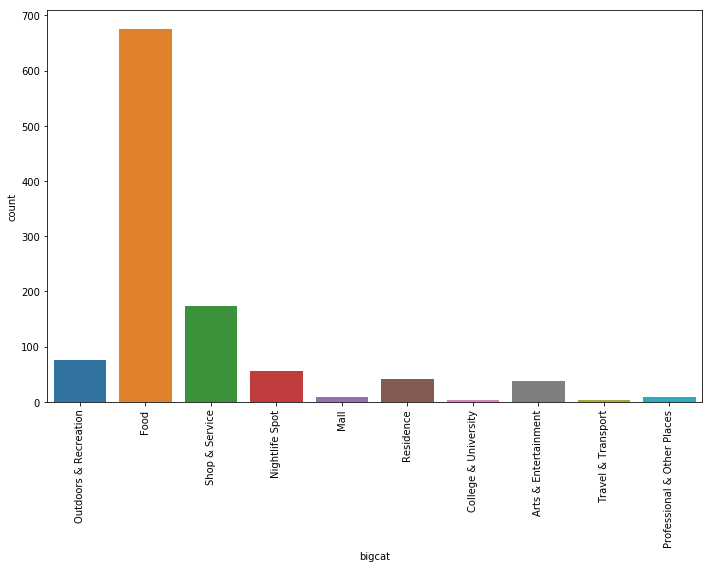

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(dfvenues['bigcat'])
plt.xticks(rotation=90)
plt.tight_layout()

In [30]:
#Visualize the Locations
map_jaksel = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map

for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',

        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_jaksel)
    folium.Circle(
        [lat, lng],
        radius=600,
        color='Red',
        fill=False,
        parse_html=False).add_to(map_jaksel)
    
map_venues = map_jaksel

In [31]:
colormap = {
           'Arts & Entertainment':'red',
            'College & University':'orange',
            'Food': 'yellow',
            'Nightlife Spot':'green',
            'Outdoors & Recreation':'blue',
            'Professional & Other Places':'violet',
            'Residence':'purple',
            'Shop & Service':'cyan',
            'Travel & Transport':'magenta',
            'Mall':'black'
           }

for lat, lng,bigcat in zip(dfvenues['latitude'],dfvenues['longitude'],dfvenues['bigcat'].map(colormap)):
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        color=bigcat,
        fill=True,
        fill_opacity=1,
        parse_html=False).add_to(map_venues)

Create pivot table with neighborhood latitude longitude and count of each categories

In [32]:
dfstudyarea = dfstudyarea[['latitude','longitude']]
for i in dfvenues['bigcat'].unique():
    dfstudyarea.loc[:,i] = 0
dfstudyarea.loc[:,'venue_count'] = 0

for region_index, bigcat in zip(dfvenues['region_index'],dfvenues['bigcat']):
    for i in region_index:
        dfstudyarea.loc[i,bigcat] += 1
        dfstudyarea.loc[i,'venue_count'] += 1
dfstudyarea.tail()

cat = ['Arts & Entertainment', 'College & University', 'Food',
       'Nightlife Spot', 'Outdoors & Recreation',
       'Professional & Other Places', 'Residence', 'Shop & Service',
       'Travel & Transport','Mall']

#for i in cat:
#    dfstudyarea[i] = round(dfstudyarea[i] / dfstudyarea['venue_count'],4)

dfstudyarea.tail()

,latitude,longitude,Outdoors & Recreation,Food,Shop & Service,Nightlife Spot,Mall,Residence,College & University,Arts & Entertainment,Travel & Transport,Professional & Other Places,venue_count
44,-6.241988,106.787195,1,21,3,1,1,1,0,2,0,0,30
45,-6.202666,106.836754,5,12,5,1,0,2,0,3,0,0,28
46,-6.249647,106.836918,0,2,3,1,0,1,0,1,0,0,8
47,-6.202851,106.782546,1,18,5,1,0,4,1,0,0,0,30
48,-6.249834,106.782704,1,21,6,0,0,1,0,1,0,0,30


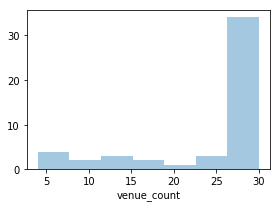

In [33]:
plt.figure(figsize = (4,3))
sns.distplot(dfstudyarea['venue_count'], kde = False)
plt.tight_layout()

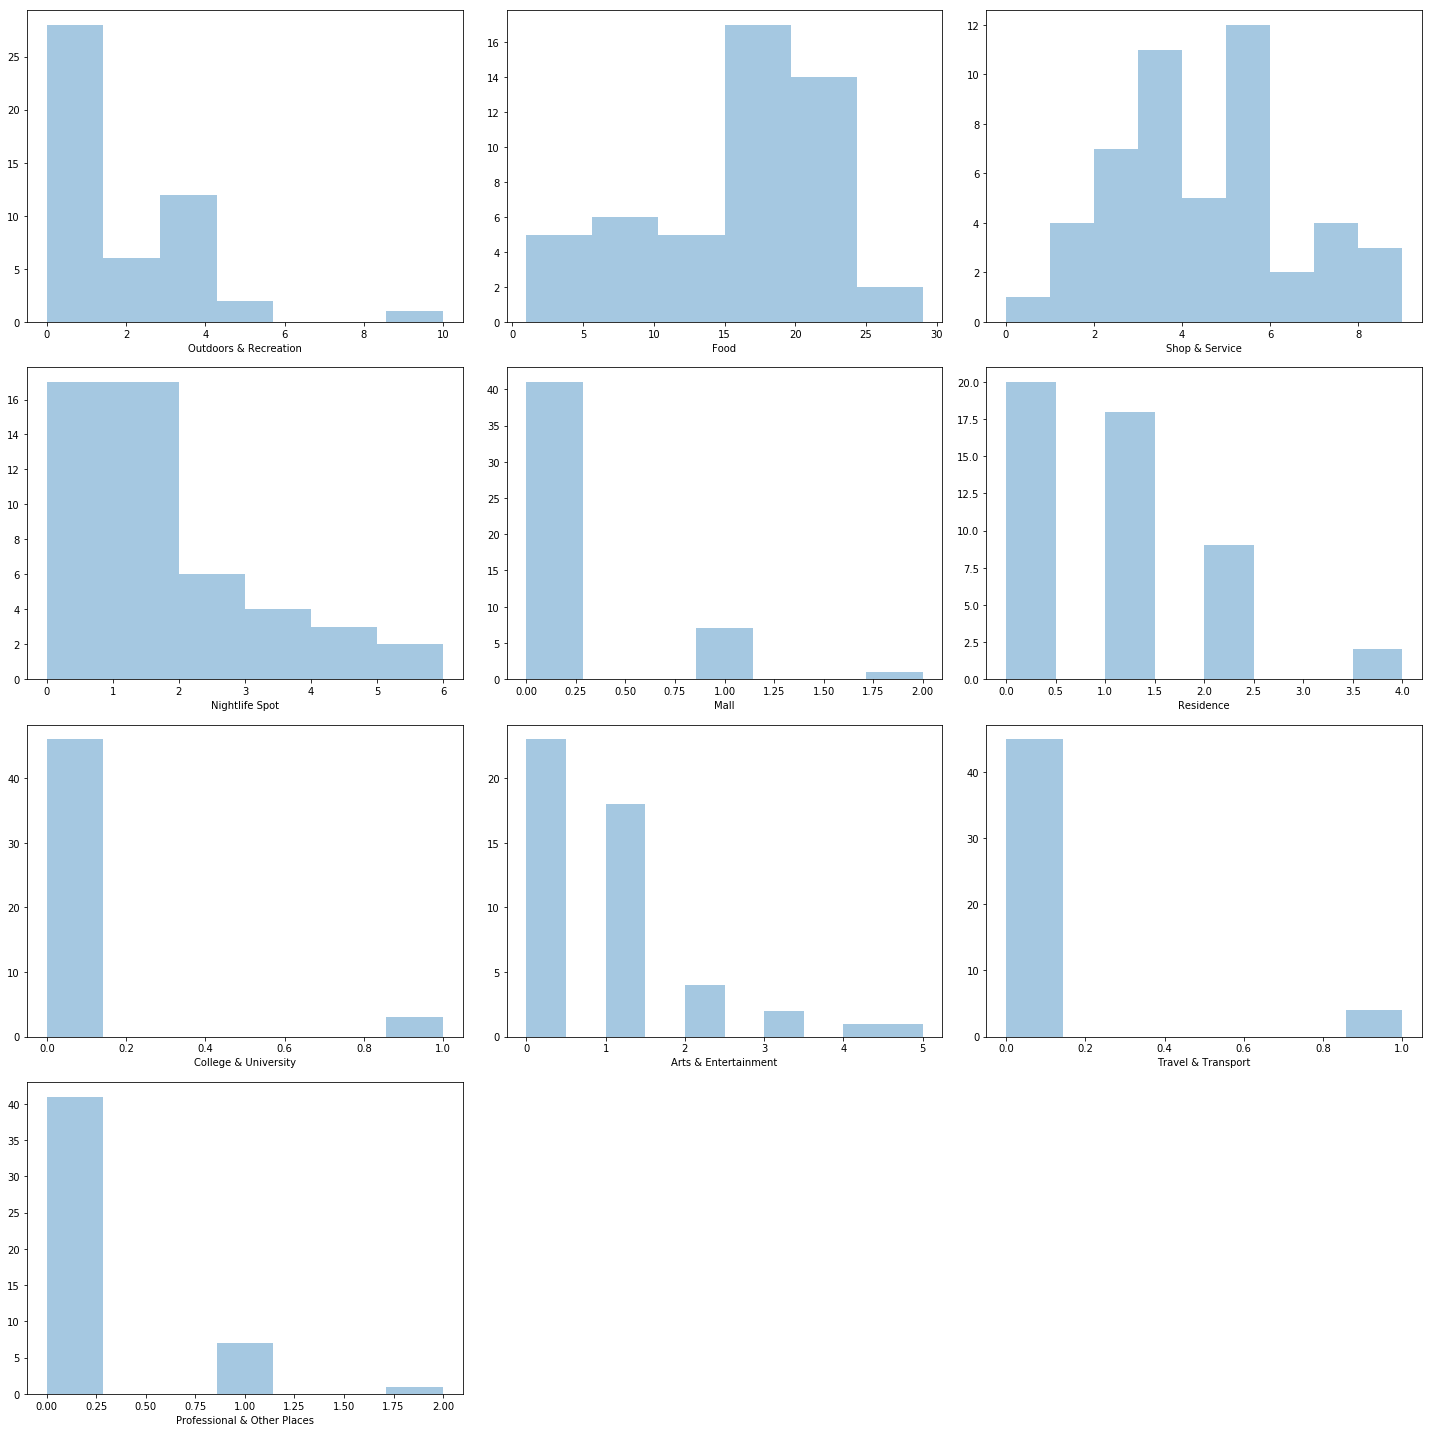

In [34]:
plt.figure(figsize = (20,20))
for i,col in enumerate(dfvenues['bigcat'].unique()):
    plt.subplot(4,3,i+1)
    sns.distplot(dfstudyarea[col], kde = False)
    plt.tight_layout()

**Insight** : Most of the locations have very low data on 'College & University','Travel & Transport','Professional & Other Places'  
**Decision** : Join 'College & University','Travel & Transport','Professional & Other Places' into 1 columns, 'Others'

In [35]:
dfstudyarea.loc[:,'Others'] = dfstudyarea['College & University']+dfstudyarea['Travel & Transport']+dfstudyarea['Professional & Other Places']
dfstudyarea=dfstudyarea.drop(columns = ['College & University','Travel & Transport','Professional & Other Places'])
dfstudyarea.head()

,latitude,longitude,Outdoors & Recreation,Food,Shop & Service,Nightlife Spot,Mall,Residence,Arts & Entertainment,venue_count,Others
0,-6.226234,106.814248,0,18,8,4,0,0,0,30,0
1,-6.218420,106.809704,5,11,5,3,0,0,1,27,2
2,-6.234080,106.809757,0,29,0,1,0,0,0,30,0
3,-6.210574,106.814194,0,26,4,0,0,0,0,30,0
4,-6.241895,106.814302,1,23,4,1,0,0,0,30,1


### Correlation

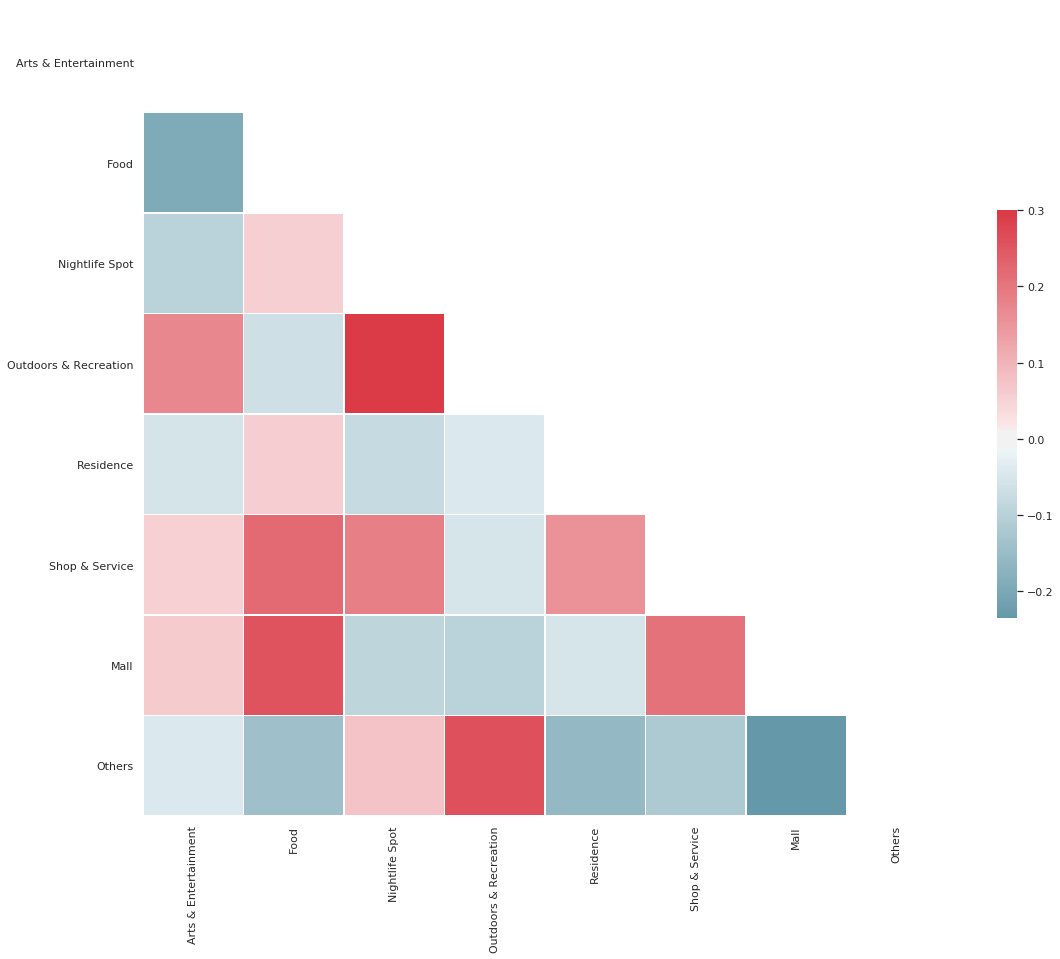

In [36]:
cat = ['Arts & Entertainment', 'Food',
       'Nightlife Spot', 'Outdoors & Recreation',
        'Residence', 'Shop & Service',
       'Mall','Others']
dataset2 = dfstudyarea[cat]

## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


**Insights** : No pairs that are too correlated, hence each category may contributes to clustering. However, there are slight correlation among food & shop&services. As these 2 factors may be crucial in deciding hotel locations, we will explore them further

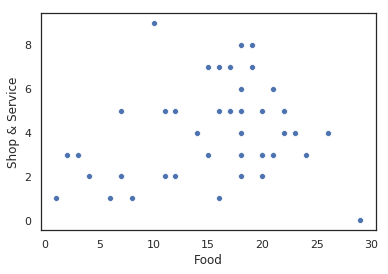

In [37]:
temp = dfstudyarea.copy()
sns.scatterplot(x='Food',y='Shop & Service', data = temp)

### Geo Analysis

In [38]:
y='Arts & Entertainment'
temp = dfstudyarea.copy()
label = ['#FFFFE5','#FEC44F','#FE9929','#CC4C02','#662506']

#bin the data
no_bins=5
bins = np.round(np.linspace(temp[y].min(), temp[y].max(), no_bins+1),1)
bins

array([0., 1., 2., 3., 4., 5.])

In [39]:
y='venue_count'
temp = dfstudyarea.copy()
label = ['#FFFFE5','#FEC44F','#FE9929','#CC4C02','#662506']

#bin the data
no_bins=5
label = label[0:no_bins]
bins = np.round(np.linspace(temp[y].min(), temp[y].max(), no_bins+1),1)
temp['color'] = pd.cut(temp[y], bins = bins, include_lowest = True,labels=label)

#Visualize the Locations
map_density = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map

for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',

        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_density)
    folium.Circle(
        [lat, lng],
        radius=600,
        color='Red',
        fill=False,
        parse_html=False).add_to(map_density)
for lat, lng,color in zip(temp['latitude'],temp['longitude'],temp['color']):
    folium.Circle(
        [lat, lng],
        radius=500,
        color=color,
        fill=True,
        fill_opacity=0.5,
        parse_html=False).add_to(map_density)

map_density

In [40]:
#Density of Venues that may attract hotel residents
temp = dfstudyarea.copy()
temp['special_venue'] = (temp['Arts & Entertainment']+temp['Shop & Service']+temp['Nightlife Spot']+temp['Outdoors & Recreation']+temp['Mall'])
label = ['#FFFFE5','#FEC44F','#FE9929','#CC4C02','#662506']
y='special_venue'

#bin the data
no_bins=5
label = label[0:no_bins]
bins = np.round(np.linspace(temp[y].min()-1, temp[y].max()+1, no_bins+1),1)
temp['color'] = pd.cut(temp[y], bins = bins, include_lowest = True,labels=label)

#Visualize the Locations
map_density = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map

for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',

        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_density)
    folium.Circle(
        [lat, lng],
        radius=600,
        color='Red',
        fill=False,
        parse_html=False).add_to(map_density)
for lat, lng,color in zip(temp['latitude'],temp['longitude'],temp['color']):
    folium.Circle(
        [lat, lng],
        radius=500,
        color=color,
        fill=True,
        fill_opacity=0.5,
        parse_html=False).add_to(map_density)

map_density

**Insight** : Food Columns have very large number and distributed well in all areas. Including them up, overshadow all other parameters in this heatmap

## 03.2 Neighborhood & Hotels

In [41]:
dfstudyarea.head()

,latitude,longitude,Outdoors & Recreation,Food,Shop & Service,Nightlife Spot,Mall,Residence,Arts & Entertainment,venue_count,Others
0,-6.226234,106.814248,0,18,8,4,0,0,0,30,0
1,-6.218420,106.809704,5,11,5,3,0,0,1,27,2
2,-6.234080,106.809757,0,29,0,1,0,0,0,30,0
3,-6.210574,106.814194,0,26,4,0,0,0,0,30,0
4,-6.241895,106.814302,1,23,4,1,0,0,0,30,1


Assign each hotels to their respective neighborhood by assigning the index of the neighborhood DF into hotels columns

In [42]:
from math import sin, cos, sqrt, atan2, radians

def distance(lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6373000

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c


In [43]:
dfhotel2 = dfhotel.copy()
i=0
sa_index = 0
temp = []
for hotel_lat, hotel_lon,hotel_id in zip(dfhotel.latitude, dfhotel.longitude, dfhotel.place_id):
    sa_index = 0
    for sa_lat, sa_lon in zip(dfstudyarea.latitude, dfstudyarea.longitude):
        if distance(hotel_lat,hotel_lon,sa_lat,sa_lon) <= 600:
            temp.append([hotel_id,sa_index])
        sa_index += 1
        
temp = pd.DataFrame(temp, columns = ['place_id','sa_index'])
temp.drop_duplicates(inplace=True)

def jointogether(lists):
    x=[]
    for i in lists:
        x.append(i)
    return x

temp = temp.groupby('place_id')['sa_index'].agg(jointogether)
temp = pd.DataFrame(temp).reset_index()

dfhotel2 = pd.merge(dfhotel2, temp, how = 'left',on='place_id')
dfhotel2.head()

,place_id,name,rating,types,user_ratings_total,address,latitude,longitude,lodging_type,sa_index
0,ChIJs5U1yeLzaS4RytKL8ru-Yik,Hotel Kartika Chandra,4.3,"['lodging', 'point_of_interest', 'establishment']",5816.0,"Jl. Jendral Gatot Subroto Kav. 18-20, Karet Se...",-6.227356,106.818995,hotels,"[0, 7]"
1,ChIJAQAAQFjxaS4R9BsxAFFtVzA,"The Ritz-Carlton Jakarta, Pacific Place",4.7,"['lodging', 'point_of_interest', 'establishment']",7737.0,"Scbd, Sudirman Central Business District, Jala...",-6.224051,106.809820,hotels,"[0, 8]"
2,ChIJ0yJpNP3zaS4R5r4fsXvnHSE,favehotel Gatot Subroto Jakarta,4.2,"['lodging', 'point_of_interest', 'establishment']",2533.0,"Jalan Kartika Candra No.kav. A9, RT.5/RW.2, Ka...",-6.227112,106.819572,hotels,"[0, 7]"
3,ChIJ_foHy1XxaS4RVJ7L7nQJtA8,Crowne Plaza Jakarta,4.4,"['lodging', 'point_of_interest', 'establishment']",4009.0,Jalan Gatot Subroto Jalan Kavling II No.3,-6.221657,106.814922,hotels,"[0, 9]"
4,ChIJARQfVFfxaS4RxGjS_C1UJew,SCBD Mansion,4.8,"['lodging', 'point_of_interest', 'establishment']",29.0,"Jalan Tulodong Bawah X No.30, RT.4/RW.1, Senayan",-6.227641,106.812292,residences,[0]


Join the hotels data together with the location df

In [44]:
dfhotel2 = dfhotel2[dfhotel2['lodging_type']!= '']
dfhotel2

dfstudyarea2 = dfstudyarea[['latitude','longitude']]
for i in dfhotel2['lodging_type'].unique():
    dfstudyarea2.loc[:,i] = 0
dfstudyarea2.loc[:,'hotel_count'] = 0
dfstudyarea2.loc[:,'avg_rating'] = 0
dfstudyarea2.loc[:,'avg_rtcount'] = 0

for region_index, types, rating, count in zip(dfhotel2['sa_index'],dfhotel2['lodging_type'],dfhotel2['rating'],dfhotel2['user_ratings_total']):
    for i in region_index:
        dfstudyarea2.loc[i,types] += 1
        dfstudyarea2.loc[i,'hotel_count'] += 1
        dfstudyarea2.loc[i,'avg_rating'] += rating
        dfstudyarea2.loc[i,'avg_rtcount'] += count
        
dfstudyarea2.loc[:,'avg_rating'] = dfstudyarea2.loc[:,'avg_rating']/dfstudyarea2.loc[:,'hotel_count']
dfstudyarea2.loc[:,'avg_rtcount'] = dfstudyarea2.loc[:,'avg_rtcount']/dfstudyarea2.loc[:,'hotel_count']

dfstudyarea2.loc[:,'hotels'] = dfstudyarea2.loc[:,'hotels']/dfstudyarea2.loc[:,'hotel_count']
dfstudyarea2.loc[:,'residences'] = dfstudyarea2.loc[:,'residences']/dfstudyarea2.loc[:,'hotel_count']
dfstudyarea2.loc[:,'houses-chain'] = dfstudyarea2.loc[:,'houses-chain']/dfstudyarea2.loc[:,'hotel_count']
dfstudyarea2.loc[:,'houses-modified'] = dfstudyarea2.loc[:,'houses-modified']/dfstudyarea2.loc[:,'hotel_count']
dfstudyarea2.loc[:,'apartments'] = dfstudyarea2.loc[:,'apartments']/dfstudyarea2.loc[:,'hotel_count']
dfstudyarea2.tail()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,latitude,longitude,hotels,residences,houses-modified,houses-chain,apartments,hotel_count,avg_rating,avg_rtcount
44,-6.241988,106.787195,0.500000,0.100000,0.300000,0.100000,0.000000,10,4.420000,1116.200000
45,-6.202666,106.836754,0.333333,0.200000,0.066667,0.400000,0.000000,15,4.286667,378.800000
46,-6.249647,106.836918,0.000000,0.333333,0.333333,0.000000,0.333333,3,4.433333,23.000000
47,-6.202851,106.782546,0.000000,0.555556,0.333333,0.111111,0.000000,9,4.144444,39.111111
48,-6.249834,106.782704,0.400000,0.000000,0.400000,0.200000,0.000000,5,4.500000,1233.600000


### EDA

In [45]:
dfstudyarea2.head()

,latitude,longitude,hotels,residences,houses-modified,houses-chain,apartments,hotel_count,avg_rating,avg_rtcount
0,-6.226234,106.814248,0.368421,0.157895,0.263158,0.052632,0.157895,19,4.405263,1328.157895
1,-6.218420,106.809704,0.181818,0.454545,0.000000,0.363636,0.000000,11,4.136364,1002.181818
2,-6.234080,106.809757,0.076923,0.307692,0.538462,0.076923,0.000000,13,4.415385,106.538462
3,-6.210574,106.814194,0.153846,0.307692,0.307692,0.000000,0.230769,13,4.300000,792.846154
4,-6.241895,106.814302,0.266667,0.133333,0.333333,0.266667,0.000000,15,4.393333,231.600000


In [46]:
dfstudyarea2[dfstudyarea2['hotels'].isnull()]

,latitude,longitude,hotels,residences,houses-modified,houses-chain,apartments,hotel_count,avg_rating,avg_rtcount
37,-6.218326,106.836809,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


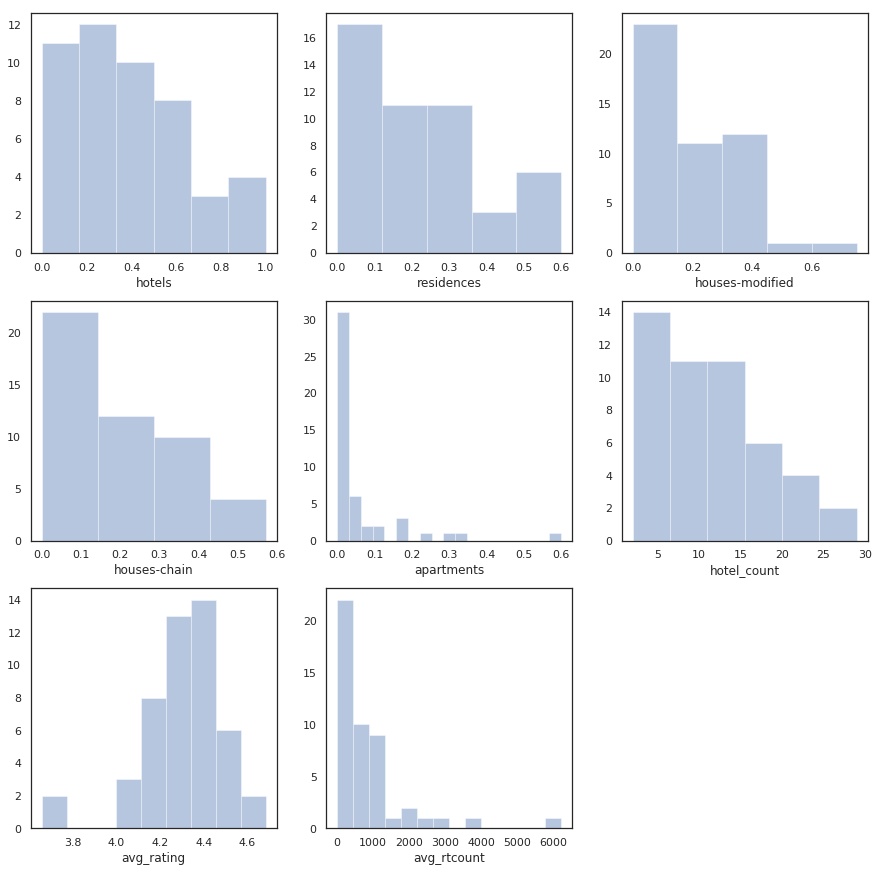

In [47]:
dfstudyarea2= dfstudyarea2[dfstudyarea2['hotels'].notnull()]
col = ['hotels',
 'residences',
 'houses-modified',
 'houses-chain',
 'apartments',
 'hotel_count',
 'avg_rating',
 'avg_rtcount']

plt.figure(figsize = (15,15))
for i, x in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.distplot(dfstudyarea2[x], kde = False)

In [48]:
dfstudyarea2.columns

Index(['latitude', 'longitude', 'hotels', 'residences', 'houses-modified',
       'houses-chain', 'apartments', 'hotel_count', 'avg_rating',
       'avg_rtcount'],
      dtype='object')

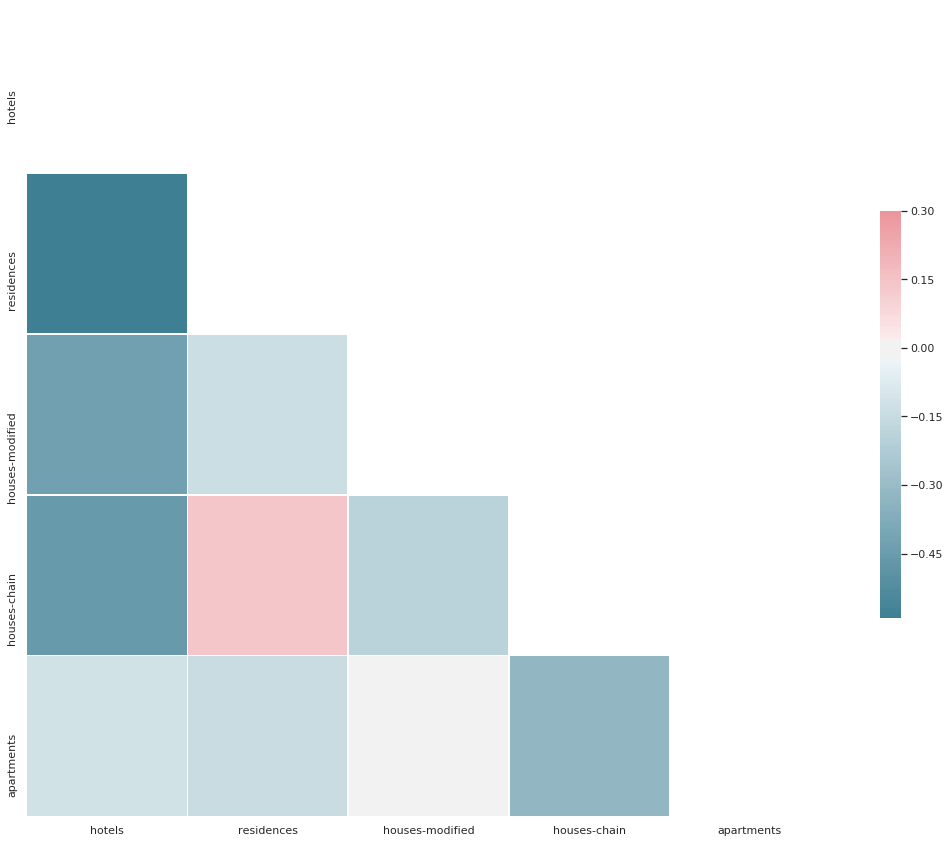

In [49]:
cat = ['hotels', 'residences',
       'houses-modified', 'houses-chain',
        'apartments']
dataset2 = dfstudyarea2[cat]

## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [50]:
#Density of Venues that may attract hotel residents
temp = dfstudyarea2.copy()
label = ['#FFFFE5','#FEC44F','#FE9929','#CC4C02','#662506']
y='hotel_count'

#bin the data
no_bins=5
label = label[0:no_bins]
bins = np.round(np.linspace(temp[y].min()-1, temp[y].max()+1, no_bins+1),1)
temp['color'] = pd.cut(temp[y], bins = bins, include_lowest = True,labels=label)

#Visualize the Locations
map_density = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map

for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',
        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_density)
    folium.Circle(
        [lat, lng],
        radius=600,
        color='Red',
        fill=False,
        parse_html=False).add_to(map_density)
for lat, lng,color in zip(temp['latitude'],temp['longitude'],temp['color']):
    folium.Circle(
        [lat, lng],
        radius=500,
        color=color,
        fill=True,
        fill_opacity=0.5,
        parse_html=False).add_to(map_density)

map_density

## 03.2 Venues & Hotels

In [51]:
dfjoin = pd.merge(dfstudyarea2,dfstudyarea)
dfjoin.head()

,latitude,longitude,hotels,residences,houses-modified,houses-chain,apartments,hotel_count,avg_rating,avg_rtcount,Outdoors & Recreation,Food,Shop & Service,Nightlife Spot,Mall,Residence,Arts & Entertainment,venue_count,Others
0,-6.226234,106.814248,0.368421,0.157895,0.263158,0.052632,0.157895,19,4.405263,1328.157895,0,18,8,4,0,0,0,30,0
1,-6.218420,106.809704,0.181818,0.454545,0.000000,0.363636,0.000000,11,4.136364,1002.181818,5,11,5,3,0,0,1,27,2
2,-6.234080,106.809757,0.076923,0.307692,0.538462,0.076923,0.000000,13,4.415385,106.538462,0,29,0,1,0,0,0,30,0
3,-6.210574,106.814194,0.153846,0.307692,0.307692,0.000000,0.230769,13,4.300000,792.846154,0,26,4,0,0,0,0,30,0
4,-6.241895,106.814302,0.266667,0.133333,0.333333,0.266667,0.000000,15,4.393333,231.600000,1,23,4,1,0,0,0,30,1


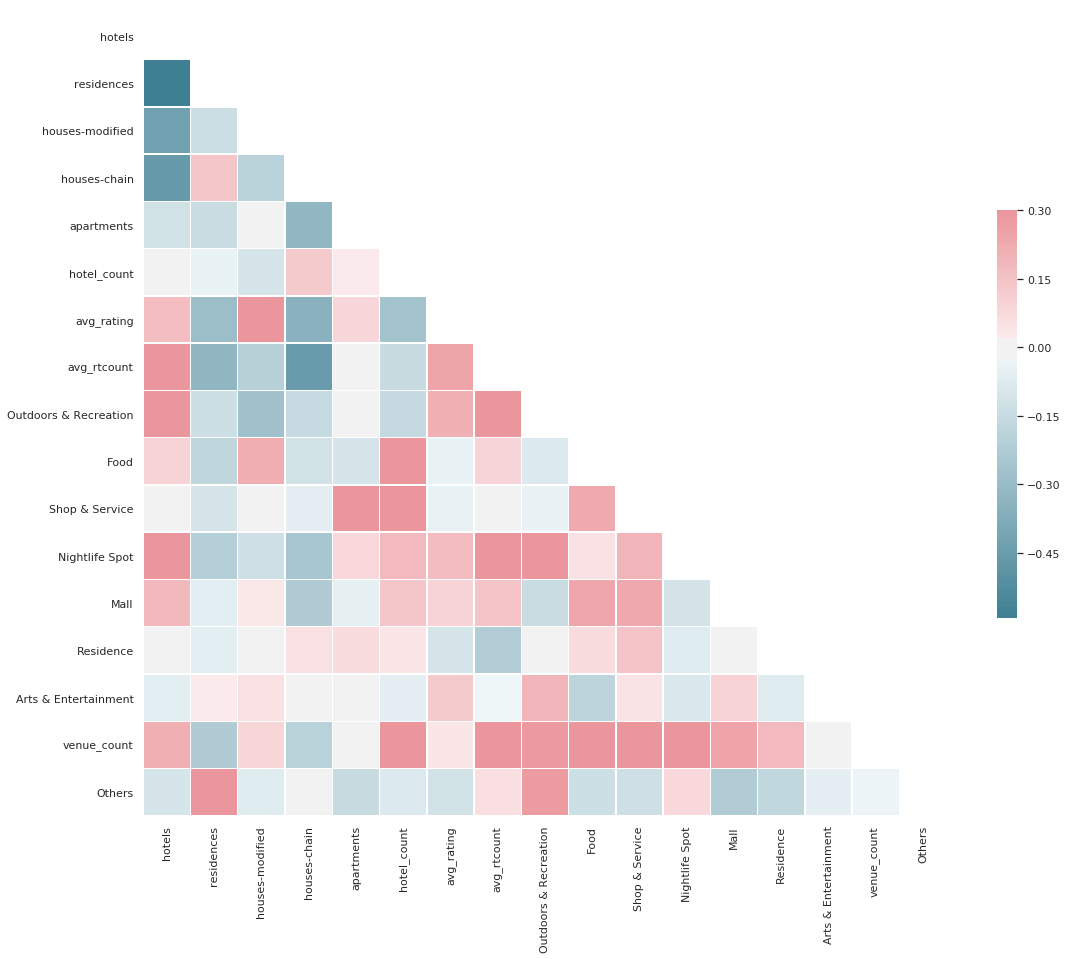

In [52]:
dataset2 = dfjoin.drop(columns = ['latitude','longitude'])

## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Apparently there are no strong correlation between venues & hotels

# 04 Model Building

## 04.1 Venues Clustering

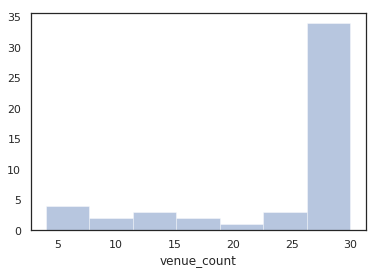

In [53]:
sns.distplot(dfstudyarea['venue_count'],kde=False)

In [54]:
dfstudyarea.tail()

,latitude,longitude,Outdoors & Recreation,Food,Shop & Service,Nightlife Spot,Mall,Residence,Arts & Entertainment,venue_count,Others
44,-6.241988,106.787195,1,21,3,1,1,1,2,30,0
45,-6.202666,106.836754,5,12,5,1,0,2,3,28,0
46,-6.249647,106.836918,0,2,3,1,0,1,1,8,0
47,-6.202851,106.782546,1,18,5,1,0,4,0,30,1
48,-6.249834,106.782704,1,21,6,0,0,1,1,30,0


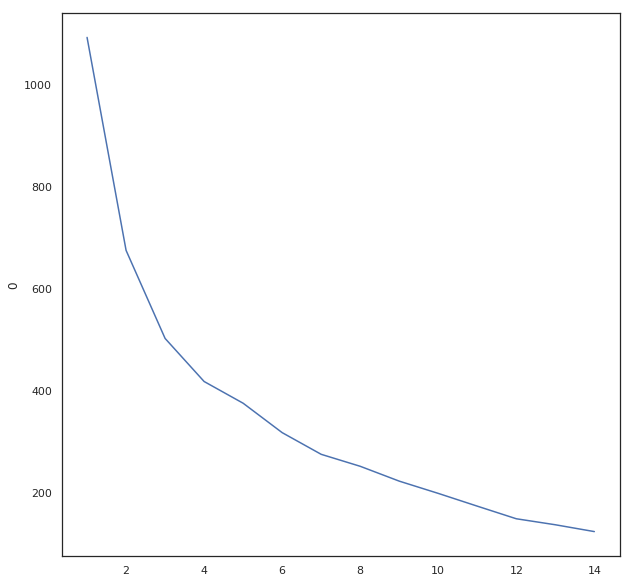

In [55]:
#Import dataset
dffvenue = dfstudyarea[dfstudyarea['venue_count']>=25]
X = dffvenue.drop(columns = ['latitude','longitude'])#,'Food','Mall','Residence'])

#Import the Machine
from sklearn.cluster import KMeans

#Determine the amount of cluster
wcss = []
for i in range (1,15):
    cluster = KMeans(n_clusters = i, init = 'k-means++', random_state = None)
    cluster.fit(X)
    wcss.append(cluster.inertia_)
wcss = pd.DataFrame(wcss)
temp = []
for i in range(1,13):
    temp.append((wcss.iloc[i-1,0] - wcss.iloc[i,0]) / ( wcss.iloc[i+1,0] - wcss.iloc[i,0]))
temp.insert(0,0)
temp.insert(len(temp),0)
wcss['angle magnitude']= temp
wcss.index = np.arange(1,len(wcss)+1)

plt.figure(figsize = (10,10))
sns.lineplot(x = range(1,15), y = wcss[0])

Decision K = 4

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3    14
0    13
2     6
1     3
Name: Cluster_group, dtype: int64


ValueError: num must be 1 <= num <= 8, not 9

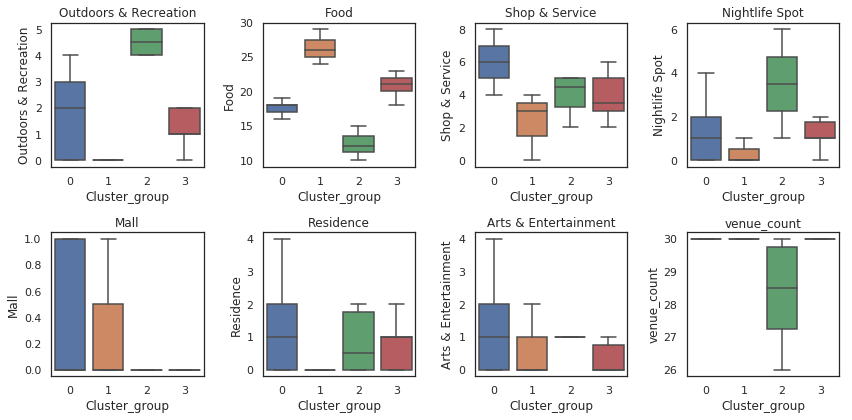

In [56]:
cluster = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y = cluster.fit_predict(X)

dffvenue.loc[:,'Cluster_group'] = y
print(dffvenue['Cluster_group'].value_counts())

inq = ['Outdoors & Recreation','Food','Shop & Service','Nightlife Spot','Mall','Residence','Arts & Entertainment','venue_count','Others']

plt.figure(figsize = (12,6))
for i,inq in enumerate(inq):
    plt.subplot(2,4,i+1)
    plt.title(inq)
    sns.boxplot(x='Cluster_group', y = inq, data = dffvenue, showfliers = False)
    plt.tight_layout()

from this boxplot we can see that the cluster can be labelled as follow :  
Cluster 0 -> shopping area  
Cluster 1 -> food area  
Cluster 2 -> entertainment area  
Cluster 3 -> mixed area  

In [57]:
dffvenue['Cluster_group'].value_counts()

3    14
0    13
2     6
1     3
Name: Cluster_group, dtype: int64

In [58]:
temp = dffvenue.copy()
color = {0:'Blue',
        1:'Orange',
        2:'Green',
        3:'Red',}
temp['Cluster_group']=temp['Cluster_group'].map(color)

#Visualize the Locations
map_density = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map

for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',
        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_density)
    folium.Circle(
        [lat, lng],
        radius=600,
        color='Red',
        fill=False,
        parse_html=False).add_to(map_density)
for lat, lng,color in zip(temp['latitude'],temp['longitude'],temp['Cluster_group']):
    folium.Circle(
        [lat, lng],
        radius=500,
        color=color,
        fill=True,
        fill_opacity=0.5,
        parse_html=False).add_to(map_density)

map_density

## 04.2 Hotel Clustering

In [59]:
dfstudyarea2.head()

,latitude,longitude,hotels,residences,houses-modified,houses-chain,apartments,hotel_count,avg_rating,avg_rtcount
0,-6.226234,106.814248,0.368421,0.157895,0.263158,0.052632,0.157895,19,4.405263,1328.157895
1,-6.218420,106.809704,0.181818,0.454545,0.000000,0.363636,0.000000,11,4.136364,1002.181818
2,-6.234080,106.809757,0.076923,0.307692,0.538462,0.076923,0.000000,13,4.415385,106.538462
3,-6.210574,106.814194,0.153846,0.307692,0.307692,0.000000,0.230769,13,4.300000,792.846154
4,-6.241895,106.814302,0.266667,0.133333,0.333333,0.266667,0.000000,15,4.393333,231.600000


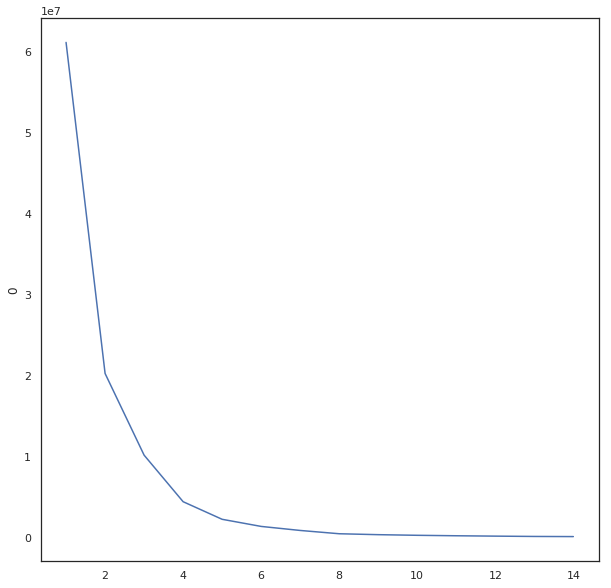

In [60]:
#Import dataset
dffhotel = dfstudyarea2.copy()
X = dffhotel.drop(columns = ['latitude','longitude'])#,'Food','Mall','Residence'])

#Import the Machine
from sklearn.cluster import KMeans

#Determine the amount of cluster
wcss = []
for i in range (1,15):
    cluster = KMeans(n_clusters = i, init = 'k-means++', random_state = None)
    cluster.fit(X)
    wcss.append(cluster.inertia_)
wcss = pd.DataFrame(wcss)
temp = []
for i in range(1,13):
    temp.append((wcss.iloc[i-1,0] - wcss.iloc[i,0]) / ( wcss.iloc[i+1,0] - wcss.iloc[i,0]))
temp.insert(0,0)
temp.insert(len(temp),0)
wcss['angle magnitude']= temp
wcss.index = np.arange(1,len(wcss)+1)

plt.figure(figsize = (10,10))
sns.lineplot(x = range(1,15), y = wcss[0])

0    28
3    14
1     5
2     1
Name: Cluster_group, dtype: int64


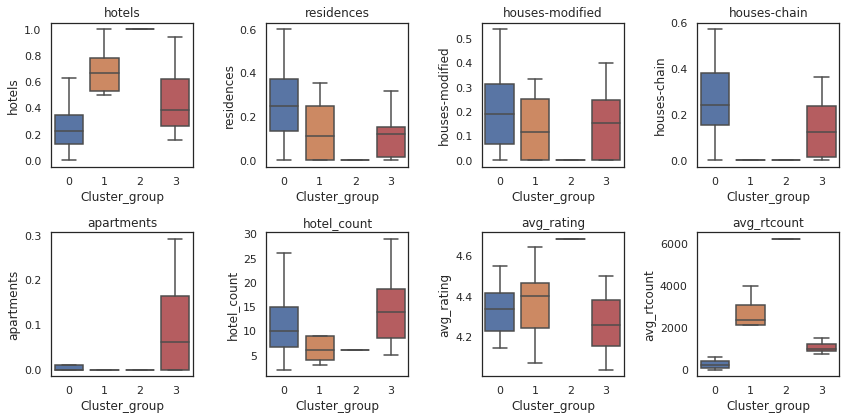

In [61]:
cluster = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y = cluster.fit_predict(X)

dffhotel.loc[:,'Cluster_group'] = y
print(dffhotel['Cluster_group'].value_counts())

inq = ['hotels', 'residences', 'houses-modified',
       'houses-chain', 'apartments', 'hotel_count', 'avg_rating',
       'avg_rtcount']

plt.figure(figsize = (12,6))
for i,inq in enumerate(inq):
    plt.subplot(2,4,i+1)
    plt.title(inq)
    sns.boxplot(x='Cluster_group', y = inq, data = dffhotel, showfliers = False)
    plt.tight_layout()

Cluster 0 (Blue) MODERN LODGING TIER-> Resi-type, Competitions (Majority are houses, modified or chain and residences), least popular, many competitions  
Cluster 1 (Orange) LESS COMPETITIVE -> yet, Hotel-dominated (minor variations in types), quite popular, least competitions  
Cluster 2 (Green) STRONG COMPETITION -> Fierce Conventional Hotels Competitions (competitions are conventional hotel chains with good ratings), very popular, highly rated  
Cluster 3 (Red) MIX OFFERING -> Mix-dominated (somewhat fair balance in hotels and newer kind of lodging), less popular, many competitions  

In [62]:
temp = dffhotel.copy()
color = {0:'Blue',
        1:'Orange',
        2:'Green',
        3:'Red',}
temp['Cluster_group']=temp['Cluster_group'].map(color)

#Visualize the Locations
map_density = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map

for lat, lng in zip(lists[0], lists[1]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='Red',
        fill=True,
        fill_color='Red',
        fill_opacity=1,
        parse_html=False).add_to(map_density)
for lat, lng,color in zip(temp['latitude'],temp['longitude'],temp['Cluster_group']):
    folium.Circle(
        [lat, lng],
        radius=500,
        color=color,
        fill=True,
        fill_opacity=0.5,
        parse_html=False).add_to(map_density)

map_density

# 05 Discussion & Results

From the clustering of the hotels,we can see each category may have their own strengths and consideration points.   

From the challenge perspective, Cluster 0 (Blue) have the most competitions amongst other clusters. However, this category is dominated with resi type accomodation, usually a lower tier accommodation provider. If the client want to invest in this category type, they could decide to give a different kind of accommodation, like conventional hotel type. if they decide to go with the residential type accommodation, they might want to explore more on the differentiating offers.

Cluster 1 (Orange) have the least competitions of all. This is a very potential area. Majority of the competitions come in the form of conventional hotel. Client could consider offering different kind, like chain like OYO or RedDoors for example.

Cluster 2 (Green) is the least favorable. It is only 1 area, but this area is 'controlled' by strong contenders with high rating and very popular providers

Cluster 3 (Red) is interesting because there are mix of offerings in the region, there are hotels, apartment kind, residential kind, indicating market demand is very flexible & diverse here

On the opportunities side, there are different kind of amenities surrounding the region, mainly, shopping (blue), food(orange), entertainment(green) and mix(red). Currently it is hard to say which is better than the others. So we will have to explore further later.

Lets combine both the analysis together. lets say, for the hotel preference, we would like to explore further cluster 0 and cluster 3. As for opportunities, lets go with entertainment and mix type.

In [71]:
tempvenue = dffvenue.copy()
color = {0:'white',
        1:'white',
        2:'Green',
        3:'Red',}
tempvenue['Cluster_group']=tempvenue['Cluster_group'].map(color)

temphotel = dffhotel.copy()
color = {0:'white',
        1:'Orange',
        2:'white',
        3:'Red',}
temphotel['Cluster_group']=temphotel['Cluster_group'].map(color)

#Visualize the Locations
map_density = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map

#for lat, lng in zip(lists[0], lists[1]):
    #folium.CircleMarker(
        #[lat, lng],
        #radius=3,
        #color='Red',
        #fill=True,
        #fill_color='Red',
        #fill_opacity=1,
        #parse_html=False).add_to(map_density)
        
for lat, lng,colorvenue, colorhotel in zip(tempvenue['latitude'],tempvenue['longitude'],tempvenue['Cluster_group'], temphotel['Cluster_group']):
    if (colorvenue != 'white') & (colorhotel != 'white'):
        folium.Circle(
            [lat, lng],
            radius=600,
            color=colorvenue,
            fill=True,
            fill_opacity=0.5,
            parse_html=False).add_to(map_density)
        
        folium.Circle(
            [lat, lng],
            radius=100,
            color=colorhotel,
            fill=True,
            fill_opacity=1,
            parse_html=False).add_to(map_density)
    
map_density

### Legend Small Circle
Cluster 0 (Blue) MODERN LODGING TIER-> Resi-type, Competitions (Majority are houses, modified or chain and residences), least popular, many competitions  
Cluster 1 (Orange) LESS COMPETITIVE -> yet, Hotel-dominated (minor variations in types), quite popular, least competitions  
Cluster 2 (Green) STRONG COMPETITION -> Fierce Conventional Hotels Competitions (competitions are conventional hotel chains with good ratings), very popular, highly rated  
Cluster 3 (Red) MIX OFFERING -> Mix-dominated (somewhat fair balance in hotels and newer kind of lodging), less popular, many competitions  

### Legend Large Circle
from this boxplot we can see that the cluster can be labelled as follow :  
Cluster 0 (Blue) -> shopping area  
Cluster 1 (Orange) -> food area  
Cluster 2 (Green) -> entertainment area  
Cluster 3 (Red) -> mixed area  

Now we are left with fewer options. With this analysis,we can not only approach clients on which of the neighborhood we prefer, we can also tell them in detail how each areas are different and what to consider for each area